# 1. Import the data

In [1]:
import pandas as pd
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.mlab as mlab

import keras
import gensim
import re, nltk, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from pprint import pprint


import logging
from optparse import OptionParser
import sys
from time import time
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn

%matplotlib inline

pd.set_option('display.max_colwidth', -1)


Using TensorFlow backend.


In [11]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [100]:
unlabeled_ads_text= pd.read_pickle('Total_unlabel_adsTEXT_+_counts_CLEAN_withcommom_feb4_FINAL.pkl')

In [101]:
unlabeled_ads_text.head(5)

,Text,word_count,char_count,numerics,upper,questionmark,Punctuation,Nmistakes,stopwords,Emojii,...,ads_clean_nocontr,ads_clean_nocontr_ht,ads_clean_nocontr_htp,ads_clean_nocontr_S,ads_clean_nocontr_spell,ads_clean_nocontr_stopword,ads_clean_nocontr_MoreWord,ads_clean_short,ads_clean_rare,ads_clean_L3
0,"My name is SWEET SUZY and I am in town eager to light your fuse for BIG Explosion Non Rush, Incredible time Building Grand Finale Nak1d Body2Body I LOVE firework displays Grand Finale of ALL types ya My Place Only ~ Avail Most Always (213)419-1215",45,247,0,7,0,1,14,8,45,...,my name is sweet suzy and i am intown e age r to light your fuse for big explosion non rush incredible t im e building grand finale nakd bodybody i love firework displays grand finale of all types ya my place only avail most always,my name is sweet suzy and i am intown e age r to light your fuse for big explosion non rush incredible t im e building grand finale nakd bodybody i love firework displays grand finale of all types ya my place only avail most always,my name is sweet suzy and i am intown e age r to light your fuse for big explosion non rush incredible t im e building grand finale nakd bodybody i love firework displays grand finale of all types ya my place only avail most always,my name is sweet suzy and i am intown e age r to light your fuse for big explosion non rush incredible t im e building grand finale nakd bodybody i love firework displays grand finale of all types ya my place only avail most always,my name is sweet such and i am into e age r to light your fuse for big explosion non rush incredible t in e building grand final naked busybody i love fireworks displays grand final of all types a my place only avail most always,name sweet e age r light fuse big explosion non rush incredible e building grand final naked busybody love fireworks displays grand final types place avail always,sweet e age light fuse big explosion non rush incredible e building grand final naked busybody love fireworks displays grand final types place always,sweet light fuse explosion rush incredible building grand final naked busybody love fireworks displays grand final types place always,sweet e age light fuse big explosion non rush incredible e building grand final naked busybody love fireworks displays grand final types place always,sweet light fuse explosion rush incredible building grand final naked busybody love fireworks displays grand final types place always
1,"10510 Abercorn St Savannah, Ga\nOpen Monday- Saturday 9am-10pm Sunday 12pm - 9pm \nbeautiful asian girls\nDream Inducing Bodywork\n\nBody Scrub\nDeep Tissue \nShiatsu \nSwedish \nAcupressure \n\n\nWalk-ins always welcome \nTable Shower included FREE!!!!\n\nVisit Us Today !!!\nLet our Hands Melt Your Stress Away\n\nCall Now\nTEL: 9124366111 \nMention you found me at Backpage.ly",46,359,2,2,0,1,17,4,54,...,abercorn st savannah ga open monday saturday am pm sunday pm pm beautiful asian girls dream inducing bodywork body scrub deep tissue shiatsu swedish a cup ressure walk ins always welcome table shower included free visit us today let our hands melt your stress away call now tel mention you found me at backp age ly,abercorn st savannah ga open monday saturday am pm sunday pm pm beautiful asian girls dream inducing bodywork body scrub deep tissue shiatsu swedish a cup ressure walk ins always welcome table shower included free visit us today let our hands melt your stress away call now tel mention you found me at backp age ly,abercorn st savannah ga open monday saturday am pm sunday pm pm beautiful asian girls dream inducing bodywork body scrub deep tissue shiatsu swedish a cup ressure walk ins always welcome table shower included free visit us today let our hands melt your stress away call now tel mention you found me at backp age ly,abercorn st savannah ga open monday saturday am pm sunday pm pm beautiful asian girls dream inducing bodywork body scrub deep tissue shiatsu swedish a cup ressure walk ins alw

In [102]:
unlabeled_ads_text.shape

(7697, 63)

In [104]:
data_text = unlabeled_ads_text[['ads_clean_L3']]
data_text['index'] = data_text.index

/Users/cristiana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
data_text

,ads_clean_L3,index
0,sweet light fuse explosion rush incredible building grand final naked busybody love fireworks displays grand final types place always,0
1,abercorn savannah open monday saturday sunday beautiful asia girls dream inducing bodywork body scrub deep tissue shirts swedish pressure walk always welcome table shower included free visit today hands melt stress away tell mention found back,1
2,looking partner talking send mess host locally love boots sucked nursed welcome email email protected,2
3,looking friend benefits serious replies email protected,3
5,looking upscaled unkind relax,5
6,join mature discreet professional finish friendly also free appointment,6
7,pictures video well snapchat purchase premium month also deals take cloths hurry snapchat makenbossmoves cash papal accepted,7
8,king fantasies exotic reality pleasure wont another girl body mind blowing skin soft touch perfect naughty little given trinity,8
9,masses relajantes disfruta lady agreeable,9
10,come enjoy relaxing soothing bodywork beautiful skilled asia girl relaxing bodywork head north boston route route private clean rooms scented candles warm towels free parking open everyday days,10


In [106]:
lemmatizer = nltk.stem.WordNetLemmatizer()
data_text['lemmatize'] = data_text['ads_clean_L3'].apply(lemmatizer.lemmatize)



/Users/cristiana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
processed_doc = data_text['lemmatize']
processed_doc[:10]

0     sweet light fuse explosion rush incredible building grand final naked busybody love fireworks displays grand final types place always                                                                                                              
1     abercorn savannah open monday saturday sunday beautiful asia girls dream inducing bodywork body scrub deep tissue shirts swedish pressure walk always welcome table shower included free visit today hands melt stress away tell mention found back
2     looking partner talking send mess host locally love boots sucked nursed welcome email email protected                                                                                                                                              
3     looking friend benefits serious replies email protected                                                                                                                                                                                            


In [108]:
from nltk.tokenize.casual import TweetTokenizer
tt = TweetTokenizer()

data_text['tokens'] = data_text['lemmatize'].apply(tt.tokenize)
#tokenize WITH EMOJIS!!!

/Users/cristiana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Let's create a dictionary from the lemmatize words containing the number of times a word appear in the training set

In [109]:
import gensim

lda_dictionary = gensim.corpora.Dictionary(data_text['tokens'])

In [110]:
count = 0
for k,v in lda_dictionary.iteritems():
    print(k,v)
    count += 1
    if count > 10 :
        break

0 always
1 building
2 busybody
3 displays
4 explosion
5 final
6 fireworks
7 fuse
8 grand
9 incredible
10 light


In [15]:
import pickle
pickle.dump(data_text['tokens'], open('corpus_unlabel_topicmod.pkl', 'wb'))
lda_dictionary.save('dictionary_unlab.gensim')

Dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)[source]
Filter out tokens that appear in

less than no_below documents (absolute number) or
more than no_above documents (fraction of total corpus size, not absolute number).
after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None).
After the pruning, shrink resulting gaps in word ids.

Note: Due to the gap shrinking, the same word may have a different word id before and after the call to this function!

In [111]:
lda_dictionary.filter_extremes(no_below = 10, no_above = 0.5, keep_n=1000)

In [112]:
count = 0
for k,v in lda_dictionary.iteritems():
    print(k,v)
    count += 1
    if count > 10 :
        break

0 always
1 grand
2 incredible
3 light
4 love
5 naked
6 place
7 rush
8 sweet
9 types
10 asia


# Doc2Vec

Initialize and train

In [16]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

bow_corpus_dc2vc = [TaggedDocument(doc, [i]) for i, doc in enumerate(data_text['tokens'])]
model = Doc2Vec(bow_corpus_dc2vc, vector_size=5, window=2, min_count=1, workers=4)



Persist a model to disk:

In [61]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("my_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!


If you’re finished training a model (=no more updates, only querying, reduce memory usage), you can do:

In [63]:
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

Infer vector for a new document:

# Gensim doc2bow

For each ads we create a dictionary reporting how many words and how many times those words appear

In [113]:
bow_corpus = [lda_dictionary.doc2bow(doc) for doc in data_text['tokens']]

In [114]:
len(bow_corpus)

7697

# TF-IDF

In [115]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)


In [116]:
corpus_tfidf = tfidf[bow_corpus]

In [117]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.16959791144769581), (1, 0.6259986665244016), (2, 0.35981375518340836), (3, 0.26183029330703295), (4, 0.13875628013913635), (5, 0.33208230589765375), (6, 0.21139089410757322), (7, 0.22351353632767276), (8, 0.17201061826822472), (9, 0.35717943674173996)]
[(0, 0.12112551481739349), (10, 0.19290011756536368), (11, 0.16363294024650651), (12, 0.13936210572305513), (13, 0.10865339158910647), (14, 0.1012582031617304), (15, 0.17320744693017698), (16, 0.21243197878898631), (17, 0.20841043865187517), (18, 0.12762974841210623), (19, 0.12041960826510409), (20, 0.15480432256178586), (21, 0.23841594559259166), (22, 0.23841594559259166), (23, 0.23717061088930608), (24, 0.23969738193813772), (25, 0.12532105458375828), (26, 0.2359593992741611), (27, 0.23717061088930608), (28, 0.16986952544446268), (29, 0.16553458649460348), (30, 0.24101707571444983), (31, 0.20971072234730856), (32, 0.19765808805435076), (33, 0.16577814886551123), (34, 0.20591927490137713), (35, 0.14649119939569633), (36, 0.167521

[(50, 0.12850927944962356), (55, 0.10944897385823614), (60, 0.1581072962681798), (61, 0.2350522314774388), (66, 0.1415819524809063), (70, 0.23282801067150893), (77, 0.2756801896451711), (89, 0.0820318214332241), (125, 0.08588505699616719), (139, 0.21664059702236935), (189, 0.17368260079235273), (194, 0.16777965400234837), (283, 0.17514093298207642), (342, 0.19988192345312636), (389, 0.24978938880413828), (476, 0.25140684512420164), (585, 0.17484541596800357), (645, 0.23175626852300815), (671, 0.24385056048981027), (719, 0.18695812033291043), (732, 0.3967138237402459), (891, 0.21302273775091943), (898, 0.2096771650345276)]
[(33, 0.3419446278585471), (40, 0.18017589789594374), (44, 0.18599807130716978), (89, 0.1681818733166122), (101, 0.3951386909763529), (158, 0.3825126006030962), (165, 0.2643262751394734), (372, 0.3666774296022356), (976, 0.5300555635198424)]
[(4, 0.17591385028991804), (6, 0.26799930108679126), (14, 0.179747337479), (25, 0.22246223207725774), (120, 0.2721387744475186),

[(40, 0.23042338619033925), (42, 0.20730125446826222), (44, 0.23786924841757706), (49, 0.6357789892413434), (50, 0.33694667795159366), (862, 0.5741092985715877)]
[(4, 0.3648733055925492), (40, 0.16080979807406523), (41, 0.23035172220281572), (44, 0.16600617861965944), (50, 0.23515116299160874), (144, 0.2093038346779405), (167, 0.28676164373218727), (723, 0.4487908046360638), (769, 0.4301075053289038), (926, 0.43891417725828574)]
[(19, 0.15109248217817003), (63, 0.20649315188707756), (127, 0.27082202226705426), (228, 0.15860895522219054), (331, 0.22426863112251427), (337, 0.41786327176429333), (422, 0.32243230195920525), (427, 0.24928003528759216), (460, 0.28048148266034245), (510, 0.20502180361039604), (554, 0.26312752578529985), (688, 0.2991444460700769), (747, 0.28645138724372965), (914, 0.2890316932990898)]
[(42, 0.1296359698369673), (56, 0.24677799737448153), (57, 0.2160092565399024), (89, 0.13450320592523834), (114, 0.43128744860852003), (127, 0.17802880833650206), (160, 0.2640349

[(18, 0.33843196312842955), (80, 0.41671554705958597), (246, 0.2574541632901383), (295, 0.38514408855072374), (297, 0.35866183036891325), (379, 0.39055845118249005), (619, 0.4647785834967333)]
[(41, 0.1570529825717734), (50, 0.16032522418276904), (60, 0.19725102986873577), (114, 0.16407934355141104), (154, 0.15049050034358985), (228, 0.15866498472399296), (246, 0.12186514088880873), (286, 0.20994857258920735), (293, 0.22730218953343914), (297, 0.16977148060366934), (337, 0.20900544215275), (341, 0.2247603937636028), (348, 0.2540788399494065), (375, 0.24684556177416792), (410, 0.24809249450673), (439, 0.2592269431182018), (451, 0.31791967672725224), (641, 0.24684556177416792), (774, 0.32018473291374105), (914, 0.2891337953636168)]
[(4, 0.12935230964897781), (13, 0.14182398699776333), (55, 0.14199937365996057), (92, 0.31459673842148284), (96, 0.17268807805340516), (116, 0.17179805268402248), (160, 0.2089228003997681), (168, 0.26570581541097815), (204, 0.1950472562715391), (285, 0.2894779

[(3, 0.24549692419951633), (14, 0.19940337395383903), (24, 0.15734187517306875), (28, 0.11150555526338231), (40, 0.11467776562551721), (44, 0.05919172174871134), (56, 0.09819864995232493), (66, 0.18475119477067867), (68, 0.17661625891291058), (80, 0.10315761075355706), (84, 0.19486128841490333), (96, 0.08684343320949685), (101, 0.1257482902056347), (102, 0.1380944355483527), (105, 0.10741174330019498), (113, 0.08100671548954291), (114, 0.08580960548616326), (116, 0.08639584667317071), (117, 0.12877373117701243), (125, 0.05603597992169798), (129, 0.08760510296836456), (131, 0.11388691211492392), (142, 0.07036921836567084), (160, 0.1050655810579307), (165, 0.1682375222384998), (168, 0.13362129855242302), (214, 0.12632866858793648), (239, 0.11956185961191731), (263, 0.09819864995232493), (334, 0.10342261672133725), (370, 0.09061104462146524), (384, 0.08646996664141826), (391, 0.16195760681364044), (392, 0.17490232243701873), (408, 0.12123413843002592), (409, 0.11046908966433289), (418, 0.

[(41, 0.11966141186320126), (42, 0.07515373021344637), (50, 0.12215458992780956), (66, 0.13458082887518974), (76, 0.1512609087414619), (91, 0.12448974606687019), (96, 0.12652108949236576), (104, 0.19149898571356078), (125, 0.08163810398147935), (137, 0.17285651336210356), (139, 0.2059278785494808), (144, 0.10872761065746561), (147, 0.15924489866762737), (156, 0.1819636478461251), (234, 0.11966141186320126), (246, 0.09285118039065922), (263, 0.1430643598425694), (268, 0.137459715775845), (307, 0.18668972831543798), (314, 0.1673344297317663), (334, 0.1506750903567918), (340, 0.22681294739218505), (371, 0.16676312531299534), (399, 0.2234290711979182), (469, 0.20248891976289968), (510, 0.15626487679926107), (512, 0.2476328259619558), (523, 0.22565463154809043), (566, 0.18668972831543798), (600, 0.17220610232373665), (642, 0.18404662497979019), (668, 0.22922936984360856), (725, 0.22922936984360856), (822, 0.22029609119180465)]
[(16, 0.42654022339590975), (36, 0.33636534272655233), (42, 0.15

[(11, 0.46640739367929196), (29, 0.47182770739448143), (338, 0.46184865333800085), (552, 0.5886752747194608)]
[(32, 0.38397651168371716), (53, 0.2704683656193285), (169, 0.3729985923386123), (419, 0.4538609092996313), (434, 0.3033585100738419), (637, 0.44547603114776874), (665, 0.37923073034255755)]
[(19, 0.3163742157301864), (40, 0.22949438661876417), (42, 0.20646547655625413), (44, 0.23691022931138148), (73, 0.2842340740935609), (383, 0.37608650669806626), (457, 0.391265950202666), (864, 0.610873243140867)]
[(41, 0.4317363417811511), (174, 0.5457467898606175), (304, 0.4188569083773311), (405, 0.5833721478154782)]
[(3, 0.43300961535188864), (42, 0.1819726348117065), (125, 0.19767349990944127), (136, 0.26257237311386655), (154, 0.27763394380126594), (207, 0.549190965360496), (647, 0.5409974550024809)]
[(35, 0.29069482124988194), (119, 0.26840553069311957), (384, 0.2614026706639107), (419, 0.4636160582730168), (455, 0.418805107591601), (555, 0.4258266618345591), (705, 0.4510628805377731

[(4, 0.19947208117181084), (6, 0.3038895359988423), (40, 0.17582577077026637), (41, 0.2518613267949891), (42, 0.15818230714835962), (43, 0.3631383618289428), (44, 0.18150737491122743), (89, 0.16412132727407572), (158, 0.37327730076983046), (221, 0.3336887922085081), (228, 0.25444644803373323), (383, 0.2881364589815976), (792, 0.3978587595799901)]
[(0, 0.094220690807796), (25, 0.09748430257196004), (53, 0.21660428894240547), (64, 0.19843223884584837), (68, 0.2092956963648105), (71, 0.10968419491114402), (73, 0.08415557985467102), (110, 0.12433941936262644), (132, 0.13681871043393456), (162, 0.13803393105697676), (166, 0.14280285957937766), (192, 0.15879485840771546), (198, 0.13450998015289717), (247, 0.15703102743298666), (251, 0.20142431341856995), (277, 0.15414658100742648), (283, 0.1354149577749416), (312, 0.1385323044896538), (323, 0.11882569020661146), (337, 0.12952965445891426), (359, 0.14767999790427033), (369, 0.13803393105697676), (415, 0.12728621787226202), (432, 0.15005246715

[(308, 1.0)]
[(25, 0.17672359428495354), (109, 0.5828716794358562), (120, 0.21618654958009087), (185, 0.207700276557635), (359, 0.2677204364710091), (520, 0.24632263280217612), (609, 0.257352224468834), (625, 0.34179254412862053), (681, 0.3327421181025755), (947, 0.33620625823738715)]
[(102, 0.8301621183182707), (118, 0.5575220688989104)]
[(77, 0.8123500454320348), (306, 0.26193118517693065), (417, 0.2702812189848488), (633, 0.4454520407209328)]
[]
[(18, 0.3088584046284125), (71, 0.34122505652658924), (306, 0.3207130700648629), (430, 0.514076090230697), (542, 0.48078328698529055), (600, 0.4357617213422126)]
[(4, 0.09838455006553498), (80, 0.312039345613307), (91, 0.25847332277606994), (101, 0.19018671478102966), (114, 0.129781859756359), (136, 0.1125759541434355), (186, 0.1915100684333144), (196, 0.16268539102249), (215, 0.17371505458921777), (257, 0.19196020473066117), (263, 0.14851954328622857), (284, 0.20209416569325056), (302, 0.19573783891934912), (359, 0.18848211589509803), (408,

[(146, 0.644861894707413), (409, 0.7642991147151523)]
[(33, 1.0)]
[]
[]
[(245, 1.0)]
[(42, 0.1179783485573773), (73, 0.16241682253428413), (76, 0.2374534459423671), (147, 0.2499869282287754), (196, 0.24600740371810872), (228, 0.18977578641051998), (279, 0.2453088096883357), (303, 0.29598820926266006), (326, 0.3560570698056131), (394, 0.2967381135129727), (524, 0.34426511277575306), (561, 0.23443629820661047), (757, 0.28759398511996426), (823, 0.3542387144158539)]
[(77, 1.0)]
[(14, 0.16014907271720136), (129, 0.21107781268926346), (142, 0.1695492635702136), (230, 0.3002653657957057), (263, 0.2366021560234956), (421, 0.2970128472049045), (546, 0.38556166852526325), (608, 0.2801516303182009), (672, 0.3429780158330452), (821, 0.3926779624677057), (953, 0.40953917935440937)]
[(532, 0.6065473851801089), (570, 0.5289568792191192), (642, 0.5935527688908061)]
[(7, 0.10847563459546392), (18, 0.08672916129455453), (55, 0.07392532785580505), (73, 0.07351661498201313), (74, 0.16470444625072672), (7

# Domain Specific Features in the Corpus

For a classification problem, it is important to choose the test and training corpus very carefully. For a variety of features to act in the classification algorithm, domain knowledge plays an integral part.

For example, if the problem is “Sentiment Classification on social media data”, the training corpus should consist of the data from social sources like twitter and facebook.

On the other hand if the problem is “Sentiment Classification for news data”, the corpus should consist of data from news sources. This is because the vocabulary of a corpus varies with domains. Social Media contains a lot of slangs and improper keywords like “awsum, lol, gooood” etc which are absent in any of the formal corpus such as news, blogs etc.

Let’s take an example of a naive bayes classification problem where the task is to classify the statements into two Classes: “Class A and Class B”. We’ve training data corpus and a test data corpus.  As mentioned here, the training corpus should contain the features from relevant corpus. Therefore, training corpus should consist of data points such as:



# Running LDA using Bag of Word

In [131]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 15, id2word=lda_dictionary, passes=2, workers=2)

In [119]:
for idx,topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx,topic))

Topic: 0 
Words: 0.039*"looking" + 0.030*"email" + 0.023*"protected" + 0.018*"please" + 0.015*"come" + 0.014*"discreet" + 0.010*"experience" + 0.010*"girl" + 0.010*"love" + 0.009*"pick"
Topic: 1 
Words: 0.036*"stores" + 0.022*"welcome" + 0.022*"girls" + 0.022*"beautiful" + 0.020*"walk" + 0.018*"asianmass" + 0.017*"texas" + 0.017*"mass" + 0.016*"ready" + 0.012*"ladies"
Topic: 2 
Words: 0.018*"real" + 0.018*"love" + 0.016*"escort" + 0.012*"mass" + 0.012*"host" + 0.011*"free" + 0.010*"discreet" + 0.010*"body" + 0.010*"oral" + 0.009*"meet"
Topic: 3 
Words: 0.031*"come" + 0.023*"looking" + 0.016*"girl" + 0.016*"dont" + 0.013*"mind" + 0.013*"real" + 0.011*"outcast" + 0.009*"hour" + 0.009*"serious" + 0.009*"pick"
Topic: 4 
Words: 0.036*"email" + 0.027*"protected" + 0.017*"looking" + 0.012*"friendly" + 0.012*"ready" + 0.012*"real" + 0.009*"baby" + 0.009*"finish" + 0.009*"contact" + 0.008*"right"
Topic: 5 
Words: 0.020*"email" + 0.014*"protected" + 0.013*"body" + 0.013*"mass" + 0.010*"come" + 0

# Running LDA using TF-IDF

In [130]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 20, id2word=lda_dictionary, passes=2, workers =4)

In [121]:
for idx,topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx,topic))

Topic: 0 
Words: 0.013*"hour" + 0.012*"outcast" + 0.012*"mass" + 0.008*"love" + 0.007*"body" + 0.007*"service" + 0.007*"always" + 0.006*"come" + 0.006*"looking" + 0.006*"escort"
Topic: 1 
Words: 0.020*"email" + 0.017*"looking" + 0.014*"protected" + 0.011*"girl" + 0.010*"please" + 0.008*"interested" + 0.008*"come" + 0.007*"mail" + 0.007*"host" + 0.006*"experience"
Topic: 2 
Words: 0.010*"stores" + 0.009*"service" + 0.007*"texas" + 0.007*"mass" + 0.007*"girls" + 0.007*"please" + 0.006*"love" + 0.006*"come" + 0.006*"beautiful" + 0.006*"welcome"
Topic: 3 
Words: 0.008*"email" + 0.007*"waiting" + 0.007*"please" + 0.007*"love" + 0.006*"protected" + 0.006*"body" + 0.006*"girl" + 0.006*"come" + 0.006*"clean" + 0.005*"mass"
Topic: 4 
Words: 0.009*"mind" + 0.009*"body" + 0.008*"come" + 0.008*"love" + 0.007*"special" + 0.007*"email" + 0.007*"please" + 0.006*"mass" + 0.006*"hour" + 0.006*"right"
Topic: 5 
Words: 0.014*"come" + 0.010*"guns" + 0.009*"contact" + 0.009*"real" + 0.008*"please" + 0.008*

# Compute Model Perplexity and Coherence Score
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

In [122]:
# Compute Perplexity
print('\nPerplexity for bow: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.
print('\nPerplexity for tfidf: ', lda_model_tfidf.log_perplexity(corpus_tfidf))



Perplexity for bow:  -6.545452081539057

Perplexity for tfidf:  -8.043732771435112


In [123]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_text['tokens'], dictionary=lda_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for bow: ', coherence_lda)
# Compute Coherence Score
coherence_model_lda_ididf = CoherenceModel(model=lda_model_tfidf, texts=data_text['tokens'], dictionary=lda_dictionary, coherence='c_v')
coherence_lda_ididf = coherence_model_lda_ididf.get_coherence()
print('\nCoherence Score for tfidf: ', coherence_lda_ididf)
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)


Coherence Score for bow:  0.42918408331342867

Coherence Score for tfidf:  0.3631264735160885


# How to find the optimal number of topics for LDA?
My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [124]:
coherence_values = []
model_list = []
for num_topics in range(5, 40, 5):
    model = gensim.models.LdaMulticore(bow_corpus, num_topics = num_topics, id2word=lda_dictionary, passes=2, workers=2)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=data_text['tokens'], dictionary=lda_dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
    print('Coherence model values'+str(coherencemodel.get_coherence()))

Coherence model values0.3528362835426978
Coherence model values0.3950435704284967
Coherence model values0.4466887377207859
Coherence model values0.4009510337757968
Coherence model values0.4056522836438269
Coherence model values0.40703263637342857
Coherence model values0.45845429623132633


In [125]:
coherence_values_tfidf = []
model_list_tfidf = []
for num_topics in range(5, 40, 5):
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics = num_topics , id2word=lda_dictionary, passes=2, workers =2)
    model_list_tfidf.append(lda_model_tfidf)
    coherencemodel = CoherenceModel(model=lda_model_tfidf, texts=data_text['tokens'], dictionary=lda_dictionary, coherence='c_v')
    coherence_values_tfidf.append(coherencemodel.get_coherence())
    print('Coherence model values'+str(coherencemodel.get_coherence()))

Coherence model values0.3294275263617987
Coherence model values0.33742304717844235
Coherence model values0.32596889687597386
Coherence model values0.37440867135018296
Coherence model values0.340877900503831
Coherence model values0.32947940801267844
Coherence model values0.3385653424706054


In [126]:
def plot_coh(coh_values, name):
    fig = plt.figure()
    # Show graph
    limit=40; start=5; step=5;
    x = range(start, limit, step)
    plt.plot(x, coh_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.title("Coherence score for "+str(name))
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    fig.savefig('coherence_values'+str(name)+'.png', dpi=fig.dpi)

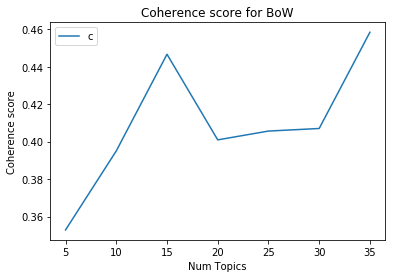

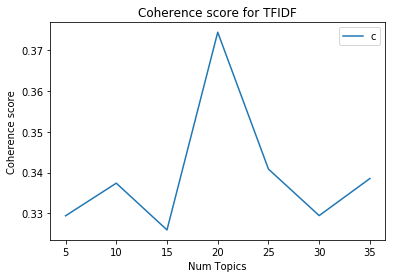

In [127]:
plot_coh(coherence_values,"BoW")
plot_coh(coherence_values_tfidf,"TFIDF")

## Can you distinguish different topics using the words in each topic and their corresponding weights?

# Test using labeled data

In [132]:
ads_nice = pd.read_pickle('Total_labelPositive_adsTEXT_+_counts_CLEAN_withcommom_feb4_FINAL.pkl')
spam_ads2 = pd.read_pickle('Total_SPAM_adsTEXT_+_counts_CLEAN_withcommom_feb4_FINAL.pkl')

In [133]:
ads_nice.head()


,URL,Text,Title,unique_text,unique_title,word_count,char_count,avg_word,numerics,upper,...,Unicode_strip,Unicode_ar,ads_clean_nocontr_ht,ads_clean_nocontr_htp,ads_clean_nocontr_S,ads_clean_nocontr_stopword,ads_clean_nocontr_MoreWord,ads_clean_freq,ads_clean_nocontr_spell,ads_clean_short
0,https://www.cityxguide.com/escorts/beaverton-incalls-ebony-asian-bombshell-smoking-hot-100-real-15886887,"['\n', ""<p>Hello Gentleman, I'm Chyna Rain &amp; im hosting in Your Area &amp; If your looking for something fun &amp; exotic I'm the #1 choice. I'm a nice Ebony/Asian blend, 5'7, 130lbs, with a pair of 34D'S to match sexy slim figure. I have almond shaped cat like eyes, a beautiful smile and my skin is as smooth as silk. I provide a non-rushed comfortable and relaxed session. My photo's are 100% real &amp; Recent ( Wait until you see me in person) You won't be disappointed!! Ä\x9f\x93Ë (206) 753-7735</p>"", '\n']",['Ä\x9f\x8fÅ Beaverton Incalls Ä\x9f\x8fÅ Ebony/Asian Bombshell Ä\x9f\x92\x83Ä\x9f\x8fË Smoking hot Ä\x9f\x94Ä½ 100% Real | United States Escorts | Oregon Escorts | Portland Escorts | cityxguide.com'],0.52179,0.855713,91,520,4.725275,0,3,...,[n pHello Gentleman Im Chyna Rain &amp; im host ting in Your Area &amp; If your looking for something fun &amp; exotic Im the # choice. Im a nice Ebony/Asian blend lbs with a pair of DS to match sexy sl im figure. I have almond shaped cat like e yes a beautiful smile and my skin is as smooth as silk. I provide a non-rushed comfortable and relaxed session. My photos are % real &amp; Recent Wait until you see me in person You wont be disappointed ÄxfxË -/p n],[n pHello Gentleman Im Chyna Rain &amp; im host ting in Your Area &amp; If your looking for something fun &amp; exotic Im the # choice. Im a nice Ebony/Asian blend lbs with a pair of DS to match sexy sl im figure. I have almond shaped cat like e yes a beautiful smile and my skin is as smooth as silk. I provide a non-rushed comfortable and relaxed session. My photos are % real &amp; Recent Wait until you see me in person You wont be disappointed ÄxfxË -/p n],n phello gentleman im chyna rain amp im host ting in your area amp if your looking for something fun amp exotic im the choice im a nice ebony asian blend lbs with a pair of ds to match sexy sl im figure i have almond shaped cat like e yes a beautiful smile and my skin is as smooth as silk i provide a non rushed comfortable and relaxed session my photos are real amp recent wait until you see me in person you wont be disappointed ä xfxë p n,n phello gentleman im chyna rain amp im host ting in your area amp if your looking for something fun amp exotic im the choice im a nice ebony asian blend lbs with a pair of ds to match sexy sl im figure i have almond shaped cat like e yes a beautiful smile and my skin is as smooth as silk i provide a non rushed comfortable and relaxed session my photos are real amp recent wait until you see me in person you wont be disappointed ä xfxë p n,n phello gentleman im chyna rain amp im host ting in your area amp if your looking for something fun amp exotic im the choice im a nice ebony asian blend lbs with a pair of ds to match sexy sl im figure i have almond shaped cat like e yes a beautiful smile and my skin is as smooth as silk i provide a non rushed comfortable and relaxed session my photos are real amp recent wait until you see me in person you wont be disappointed ä xfxë p n,n hello gentleman china rain amp host thing area amp looking something fun amp exotic choice nice bony asia blend les pair match sex figure almond shaped cat like e yes beautiful smile skin smooth silk provide non rushed comfortable relaxed session photo real amp recent wait see person wont disappointed ä xix p n,hello gentleman china rain amp host thing area amp looking something fun amp exotic choice nice bony asia blend les pair match sex figure almond shaped cat e yes beautiful smile skin smooth silk provide non rushed comfortable relaxed session photo real amp rec

In [134]:
lemmatizer = nltk.stem.WordNetLemmatizer()
ads_nice['lemmatize'] = ads_nice['ads_clean_short'].apply(lemmatizer.lemmatize)
spam_ads2['lemmatize'] = spam_ads2['ads_clean_short'].apply(lemmatizer.lemmatize)

In [135]:
from nltk.tokenize.casual import TweetTokenizer
tt = TweetTokenizer()
ads_nice['tokens'] = ads_nice['lemmatize'].apply(tt.tokenize)
spam_ads2['tokens'] = spam_ads2['lemmatize'].apply(tt.tokenize)

In [136]:
bow_positive = [lda_dictionary.doc2bow(doc) for doc in ads_nice['tokens'] ]
bow_spam = [lda_dictionary.doc2bow(doc) for doc in spam_ads2['tokens'] ]


In [137]:
new_topics_pos_tfidf  = lda_model_tfidf[bow_positive]
new_topics_pos        = lda_model[bow_positive]
new_topics_spam_tfidf = lda_model_tfidf[bow_spam]
new_topics_spam       = lda_model[bow_spam]

In [90]:
def topic_perc(topic):
    perc_tot = 0
    count = 0
    for top,per in topic:
        print('Topic: {} Percentage: {}'.format(top,per))
        perc_tot += per
        count    += 1
    return(perc_tot/count)

In [142]:
print(perc_0, perc_1, perc_2, perc_3, perc_4, perc_5, perc_6, perc_7, perc_8, perc_9, perc_10 ,perc_11,perc_12,perc_13, perc_14)

0.20184097846353113 0.27637744261147945 0.2135448844910875 0.32404913771570776 0.3873524644833109 0.4129020661942508 0.1965221739337435 0.14185106049461121 0.35214185754040483 0.040940163022076544 0.32989272728255675 0.22514043580623172 0.21753271653229356 0.19142312920053622 0.1574479120292072


<BarContainer object of 15 artists>

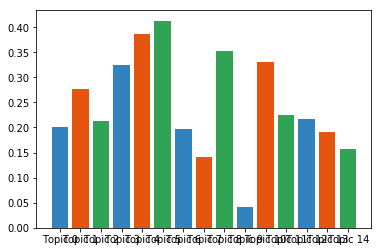

In [144]:
names = ['Topic 0','Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10','Topic 11','Topic 12', 'Topic 13', 'Topic 14']
values = [perc_0, perc_1, perc_2, perc_3, perc_4, perc_5, perc_6, perc_7, perc_8, perc_9, perc_10 ,perc_11,perc_12,perc_13, perc_14]
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.bar(names, values, color=outer_colors)

# Plot with Pydavis

Saliency: a measure of how much the term tells you about the topic.

Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data.

In [146]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, lda_dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_ (lda_display, 'lda.')

from pyLDAvis import gensim
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel
#pyLDAvis.save_html(panel, 'lda.html')

# 10 How to cluster documents that share similar topics and plot? (If needed)
This would help group topic in cluster
USE LDA TO TOPIC AND THEN K_MEAN with n_cluster = # of topic in LDA

In [120]:
 # Construct the k-means clusters
    #svd i chose the plane and make a projection
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=5, random_state=100).fit_predict(lda_model_tfidf)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components, this is needed only when you have more classes, than you do PCA 
lda_output_svd = svd_model.fit_transform(lda_model_tfidf)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]#take everything first component because the shape is 200 , 2
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
#print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

ValueError: Expected 2D array, got scalar array instead:
array=LdaModel(num_terms=1000, num_topics=6, decay=0.5, chunksize=2000).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 11 How to predict topic for a new text

In [ ]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

## 11.1 Construct a pipeline for the text

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
text_clf = Pipeline([
   ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
  ('clf', MultinomialNB()), .. ])


        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())